In [1]:
import torch as th
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

see 'https://pytorch.org/docs/stable/torch.html'

In [12]:
t2x3 = th.tensor([ [0.1, 1.2], [2.2, 3.3], [4.4, 5.5]])

In [16]:
print (t2x3)

tensor([[ 0.1000,  1.2000],
        [ 2.2000,  3.3000],
        [ 4.4000,  5.5000]])


In [3]:
a = np.array ([1,2,3])

In [5]:
t = th.from_numpy (a)   # soft copy of numpy array
print ('t = ', t)
t[0] = -1
print ('a = ', a)

t =  tensor([-1,  2,  3], dtype=torch.int32)
a =  [-1  2  3]


In [6]:
th.zeros(2,3)

tensor([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.]])

In [7]:
th.zeros(5)

tensor([ 0.,  0.,  0.,  0.,  0.])

In [11]:
th.zeros_like (t, dtype=th.float32) # the same shape as the tensor t

tensor([ 0.,  0.,  0.])

## Random Sampling

In [17]:
th.manual_seed (7)

In [22]:
t = th.empty(3,3).uniform_(0,1) # uniform_() is an in-place random sampling function

In [23]:
t

tensor([[ 0.9699,  0.1078,  0.8829],
        [ 0.4132,  0.7572,  0.6948],
        [ 0.5209,  0.5932,  0.8797]])

In [24]:
th.bernoulli (t)

tensor([[ 1.,  0.,  1.],
        [ 0.,  1.,  0.],
        [ 0.,  1.,  1.]])

In [25]:
th.normal (mean=th.arange(1.,11.), std=th.arange(1,0,-0.1))

tensor([ -0.1138,   2.2570,   2.9508,   4.4593,   5.0223,   5.7602,
          7.6857,   7.9751,   8.6277,  10.0732])

In [26]:
th.arange(1.,11.)

tensor([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [28]:
t = th.randn(1,3) # Normal Random of size 1x3
print (t)

tensor([[ 1.0260,  0.6073, -1.6128]])


In [29]:
print (t.dtype, t.device, t.layout)

torch.float32 cpu torch.strided


In [33]:
tcuda = th.randn(1,3).to('cuda')

In [35]:
print(tcuda, tcuda.dtype, tcuda.device, tcuda.layout)

tensor([[-0.0443,  0.2187, -0.0672]], device='cuda:0') torch.float32 cuda:0 torch.strided


In [37]:
dev = th.device('cuda:0')
print (dev)

cuda:0


In [39]:
tt = th.randn((2,3), device=dev)
print (tt)

tensor([[ 1.7519,  0.1969,  0.6995],
        [-0.0536,  1.0777, -0.8029]], device='cuda:0')


In [41]:
th.cuda.device(0)

In [42]:
th.cuda.device_count()

1

In [97]:
img = th.rand(1,1,4,4); 
print (img)
print ('Any data for input to NN must be of shape [batch, channel, rows, cols]')

tensor([[[[ 0.7588,  0.7981,  0.0782,  0.7314],
          [ 0.2632,  0.7995,  0.7100,  0.9718],
          [ 0.6003,  0.4355,  0.3343,  0.2836],
          [ 0.7499,  0.6684,  0.4513,  0.8876]]]])
Any data for input to NN must be of shape [batch, channel, rows, cols]


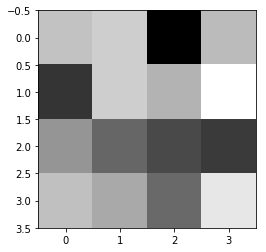

In [98]:
plt.imshow (img[0][0], cmap='gray')

In [99]:
v = th.rand(7); print (v)

tensor([ 0.5397,  0.7127,  0.4642,  0.0925,  0.6242,  0.0526,  0.4800])


In [100]:
import torch.nn as nn
import torch.nn.functional as F

In [101]:
class myModel (nn.Module):
    def __init__(self):
        super (myModel, self).__init__()
        self.c1 = nn.Conv2d (1,3, 2)
        self.relu1 = F.relu
    def forward(self, x):
        x = self.c1(x)
        x = self.relu1 (x)
        return x
    #
#

In [102]:
m = myModel()
print (m)

myModel(
  (c1): Conv2d(1, 3, kernel_size=(2, 2), stride=(1, 1))
)


In [103]:
img.shape

torch.Size([1, 1, 4, 4])

In [104]:
img.shape

torch.Size([1, 1, 4, 4])

In [105]:
m(img)

tensor([[[[ 0.0000,  0.1932,  0.0359],
          [ 0.0053,  0.0000,  0.0000],
          [ 0.1262,  0.0889,  0.0000]],

         [[ 0.1795,  0.0686,  0.7161],
          [ 0.3623,  0.0000,  0.0556],
          [ 0.2531,  0.1406,  0.2733]],

         [[ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0592,  0.0891],
          [ 0.0000,  0.0000,  0.0000]]]])

In [106]:
m = nn.Conv2d(1, # in_channels
              3, # out_channels
              3, # kernel_size,
              stride=1, padding=1)
print ('m = ', m)
output = m(img)
print ('img = ', img.shape, img)
print ('out = ', output.shape, output)

m =  Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
img =  torch.Size([1, 1, 4, 4]) tensor([[[[ 0.7588,  0.7981,  0.0782,  0.7314],
          [ 0.2632,  0.7995,  0.7100,  0.9718],
          [ 0.6003,  0.4355,  0.3343,  0.2836],
          [ 0.7499,  0.6684,  0.4513,  0.8876]]]])
out =  torch.Size([1, 3, 4, 4]) tensor([[[[-0.1318, -0.2435, -0.5610, -0.3941],
          [-0.2017, -0.3219, -0.5337,  0.0233],
          [-0.2358, -0.3710, -0.5186, -0.4093],
          [ 0.0204, -0.1944, -0.2477, -0.0489]],

         [[-0.0616, -0.0876, -0.3534,  0.0598],
          [ 0.2947,  0.2640, -0.0391,  0.0255],
          [ 0.2820,  0.1760,  0.4117,  0.5000],
          [ 0.1015,  0.0571, -0.1007,  0.0693]],

         [[ 0.7287,  0.4894,  0.6167,  0.6077],
          [ 0.5893,  1.0155,  0.6200,  0.4943],
          [ 0.5016,  0.5437,  0.6166,  0.8284],
          [ 0.5467,  0.4908,  0.5442,  0.4627]]]])


In [125]:
upsample = nn.ConvTranspose2d (1, 1, kernel_size=3, stride=1, padding=0)
o2 = upsample (img)
print ('in:', output.shape[2:], 'out:', o2.shape[2:])

in: torch.Size([4, 4]) out: torch.Size([6, 6])


In [126]:
o3 = upsample (o2)
print ('in:', o2.shape[2:], 'out:', o3.shape[2:])

in: torch.Size([6, 6]) out: torch.Size([8, 8])


In [129]:
upsample = nn.ConvTranspose2d (1, 1, kernel_size=3, stride=2, padding=0)
o2 = upsample (img)
print ('in:', output.shape[2:], 'out:', o2.shape[2:])

in: torch.Size([4, 4]) out: torch.Size([9, 9])


tensor([[[[-0.1318, -0.2435, -0.5610, -0.3941],
          [-0.2017, -0.3219, -0.5337,  0.0233],
          [-0.2358, -0.3710, -0.5186, -0.4093],
          [ 0.0204, -0.1944, -0.2477, -0.0489]],

         [[-0.0616, -0.0876, -0.3534,  0.0598],
          [ 0.2947,  0.2640, -0.0391,  0.0255],
          [ 0.2820,  0.1760,  0.4117,  0.5000],
          [ 0.1015,  0.0571, -0.1007,  0.0693]],

         [[ 0.7287,  0.4894,  0.6167,  0.6077],
          [ 0.5893,  1.0155,  0.6200,  0.4943],
          [ 0.5016,  0.5437,  0.6166,  0.8284],
          [ 0.5467,  0.4908,  0.5442,  0.4627]]]])

In [145]:
down = nn.Conv2d (1,1, kernel_size=3, stride=1)
up = nn.ConvTranspose2d (1,1, kernel_size=3, stride=1)

In [146]:
input = th.randn(1,1,16,16)

In [147]:
o1 = down(input); print (o1.shape)
o2 = down(o1); print (o2.shape)
o3 = down(o2); print (o3.shape)

torch.Size([1, 1, 14, 14])
torch.Size([1, 1, 12, 12])
torch.Size([1, 1, 10, 10])


In [148]:
u1 = up (o3); print (u1.shape)

torch.Size([1, 1, 12, 12])


In [149]:
u2 = up (u1); print (u2.shape)

torch.Size([1, 1, 14, 14])


In [150]:
u3 = up (u2); print (u3.shape)

torch.Size([1, 1, 16, 16])


In [152]:
down2 = nn.Conv2d (1,1, kernel_size=3, stride=1,padding=1)
up2 = nn.ConvTranspose2d (1,1, kernel_size=3, stride=1, padding=1)

In [157]:
o1 = down2 (input); 
print (o1.shape, input.shape, 'Equal shape: ', o1.shape == input.shape)

torch.Size([1, 1, 16, 16]) torch.Size([1, 1, 16, 16]) Equal shape:  True
